# Census Income Project

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing important Libraries

In [69]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Loading the Dataset into DataFrame and checking the first five rows

In [70]:
df.shape

(32560, 15)

Showing 32560 Rows and 15 Columns

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [73]:
(df==0).astype(bool).sum(axis=0)

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

# Since the are a lot of missing data , hence we drop columns 'Capital_gain' and 'Capital_loss'

In [74]:
df.drop(['Capital_gain','Capital_loss'],axis=1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


We Drop the Columns 'Capital_gain' and 'Capital_loss' as the missing values is high which might provide unecessar result

# Replacing '?' with mode of the value

In [75]:
(df==' ?').astype(bool).sum(axis=0)

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [76]:
print('Most Occuring Values for Workclass Column is',df['Workclass'].mode())
print('Most Occuring Values for Occupation Column is',df['Occupation'].mode())
print('Most Occuring Values for Native_country Column is',df['Native_country'].mode())

Most Occuring Values for Workclass Column is 0     Private
dtype: object
Most Occuring Values for Occupation Column is 0     Prof-specialty
dtype: object
Most Occuring Values for Native_country Column is 0     United-States
dtype: object


In [77]:
df['Workclass']=df['Workclass'].replace(' ?','Private')
df['Occupation']=df['Occupation'].replace(' ?','Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?','United-States')
(df==' ?').astype(bool).sum(axis=0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [78]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

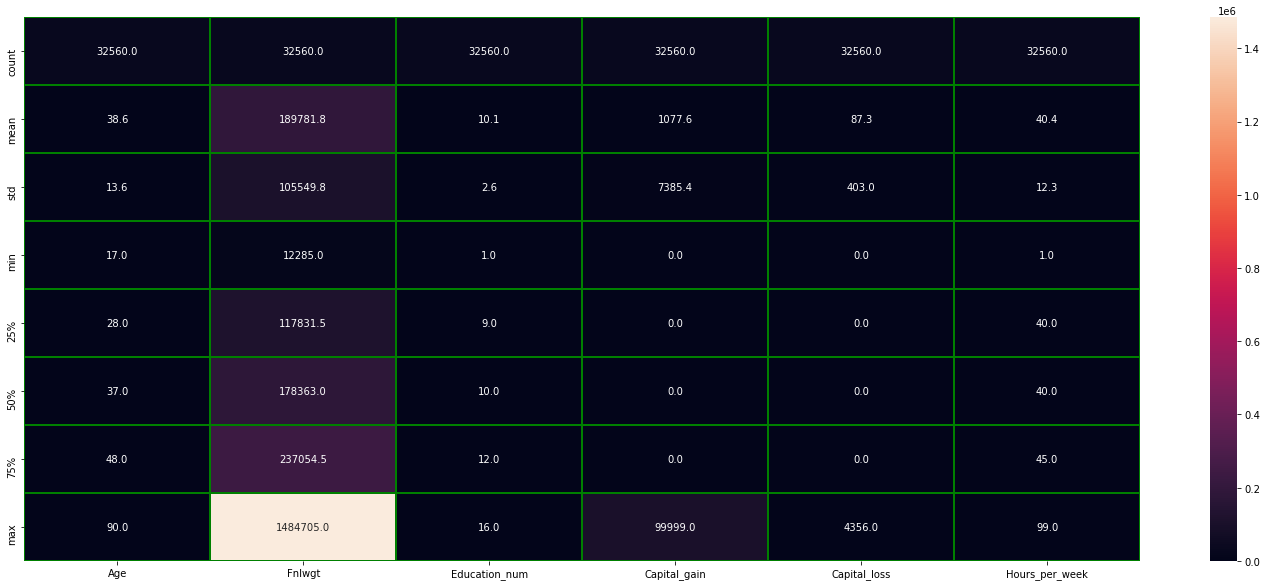

In [79]:
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

# Skewness of Columns

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Age                0.558738
Hours_per_week     0.227636
Education_num     -0.311630
dtype: float64


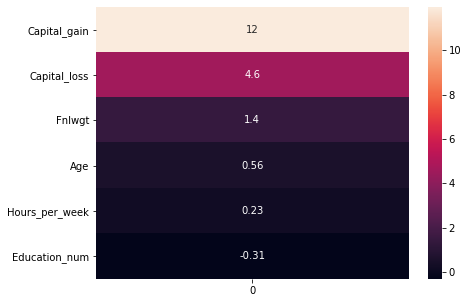

In [80]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(7,5))
sns.heatmap(skew1,annot=True)
plt.show()

Hours_per_week    1.000000
Education_num     0.148127
Capital_gain      0.078409
Age               0.068756
Capital_loss      0.054256
Fnlwgt           -0.018770
Name: Hours_per_week, dtype: float64


<AxesSubplot:>

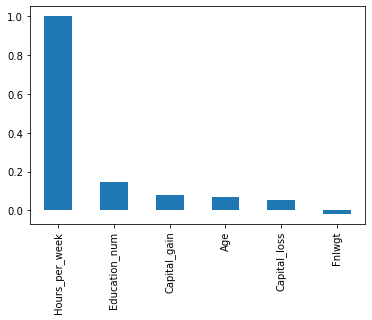

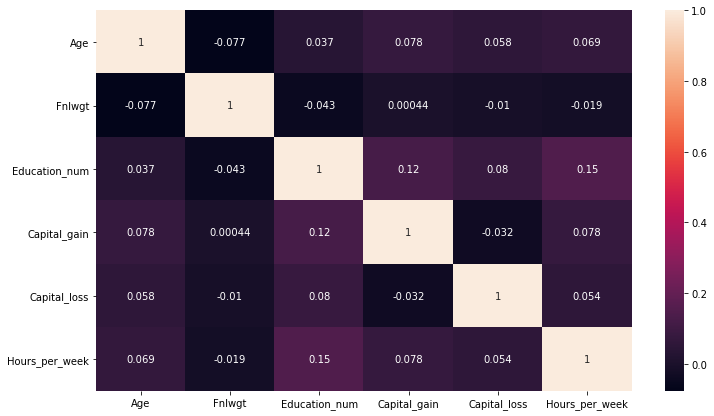

In [81]:
cor=df.corr()['Hours_per_week'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

# Plots and Graphs

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Prof-specialty        1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


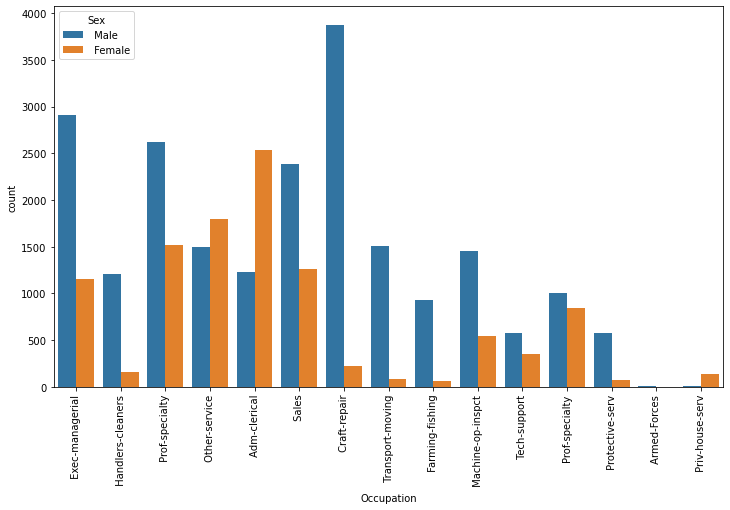

In [82]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
print(df['Occupation'].value_counts())
sns.countplot(x='Occupation',data=df,hue='Sex')
plt.show()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


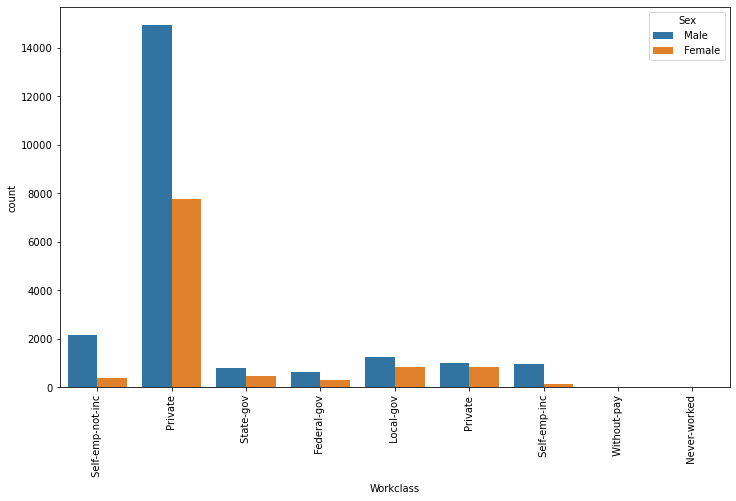

In [83]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
print(df['Workclass'].value_counts())
sns.countplot(x='Workclass',data=df,hue='Sex')
plt.show()

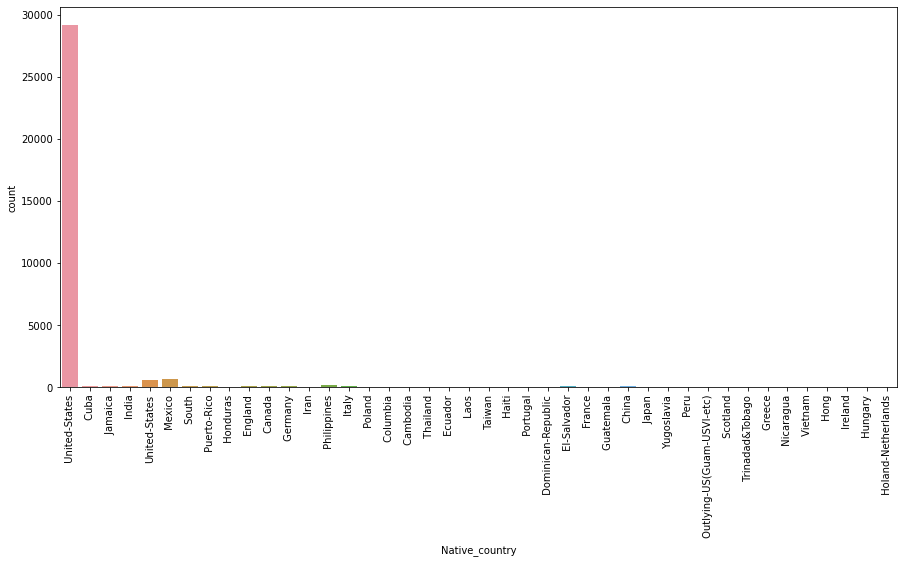

In [84]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(df['Native_country'])
plt.show()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64


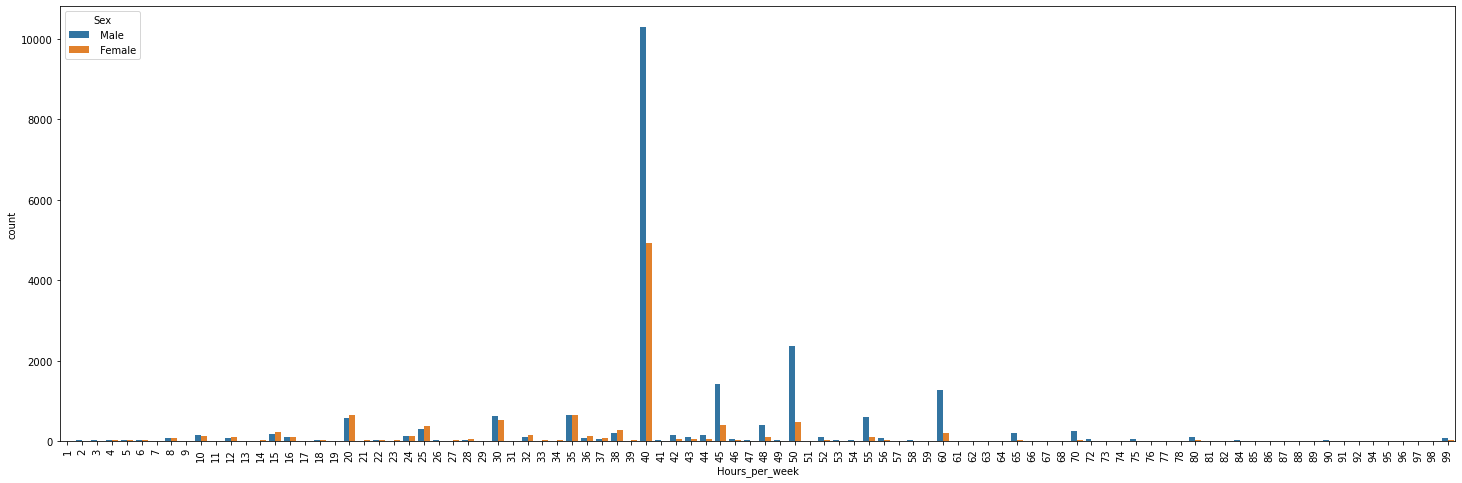

In [85]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
print(df['Hours_per_week'].value_counts())
sns.countplot(x='Hours_per_week',data=df,hue='Sex')
plt.show()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


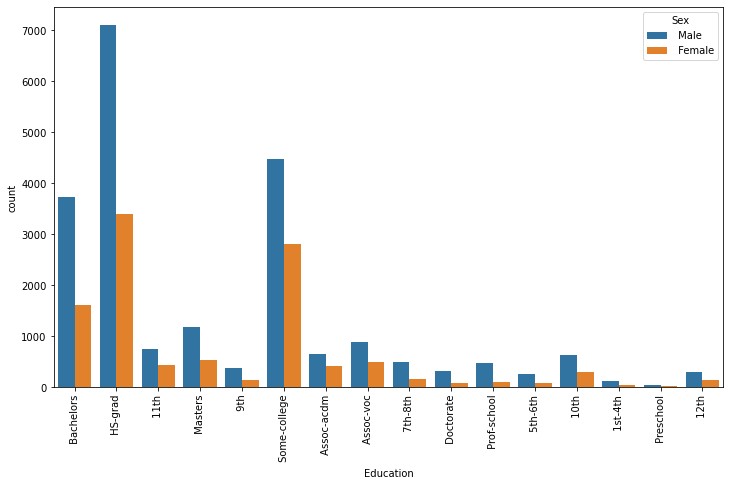

In [86]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,hue='Sex')
plt.show()

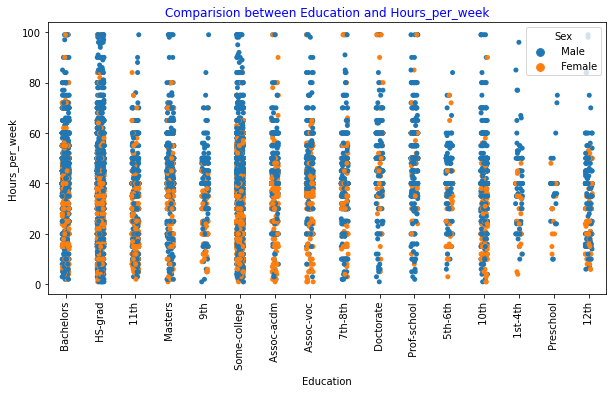

In [87]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Education and Hours_per_week',color='blue')
sns.stripplot(x='Education',y='Hours_per_week',data=df,hue='Sex')
plt.show()

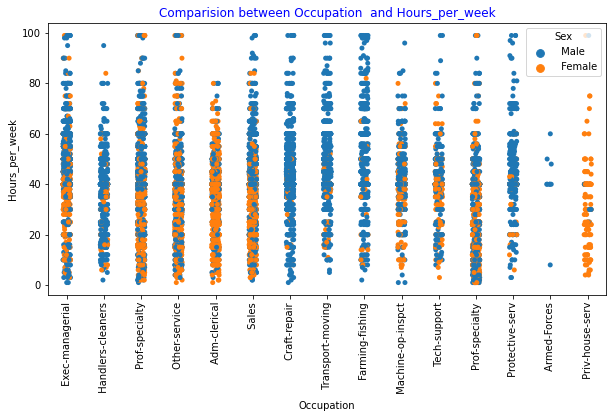

In [88]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Occupation  and Hours_per_week',color='blue')
sns.stripplot(x='Occupation',y='Hours_per_week',data=df,hue='Sex')
plt.show()

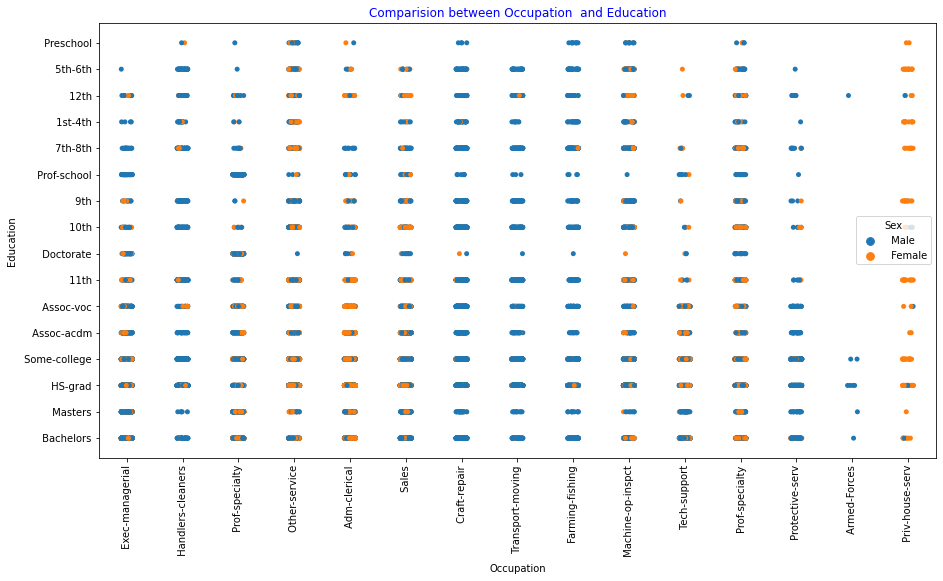

In [89]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.title('Comparision between Occupation  and Education',color='blue')
sns.stripplot(x='Occupation',y='Education',data=df,hue='Sex')
plt.show()

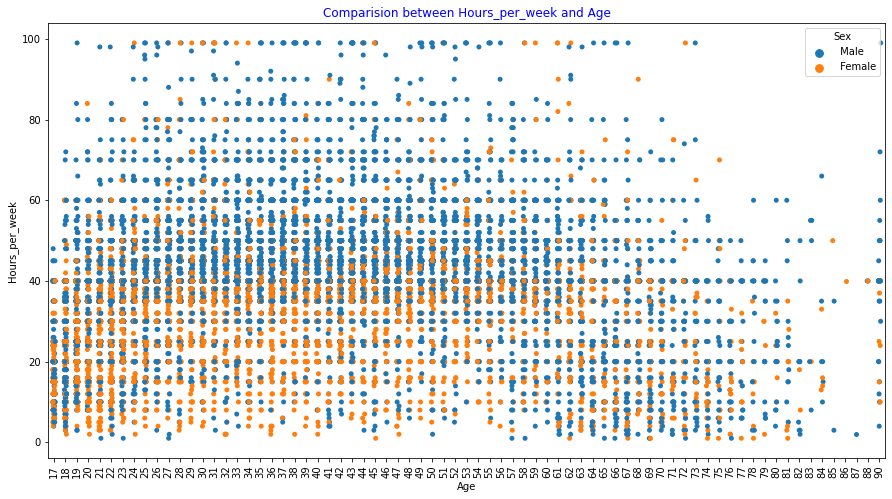

In [90]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.title('Comparision between Hours_per_week and Age',color='blue')
sns.stripplot(x='Age',y='Hours_per_week',data=df,hue='Sex')
plt.show()

# Label Encoding Columns

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
lenc=LabelEncoder()
for i in df.columns:
    df[i]=lenc.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0


# Removing Outliers

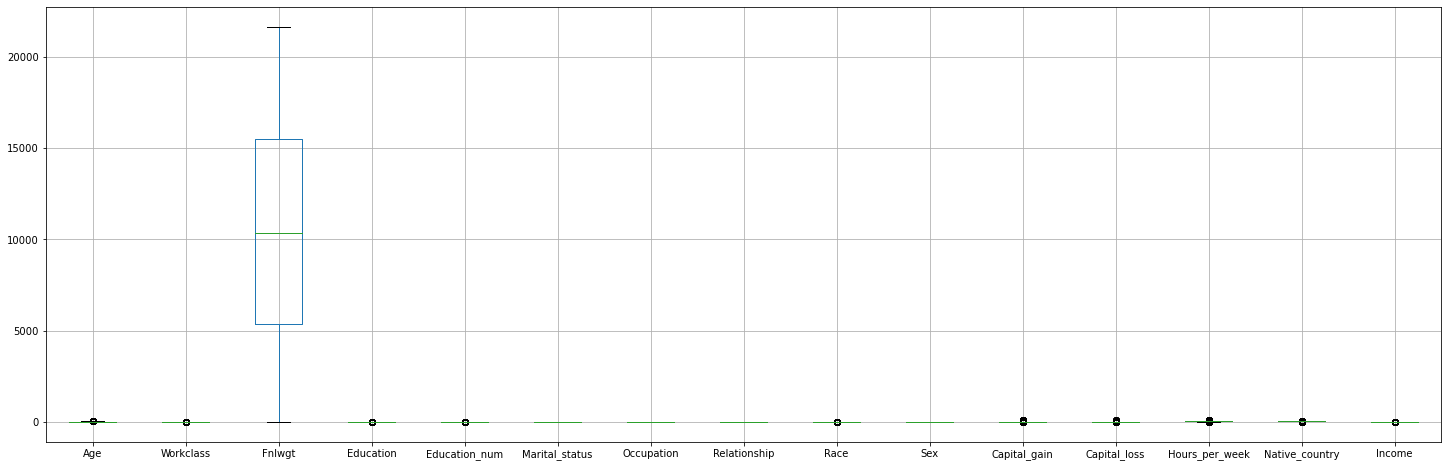

In [93]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
df.boxplot()
plt.show()

<AxesSubplot:>

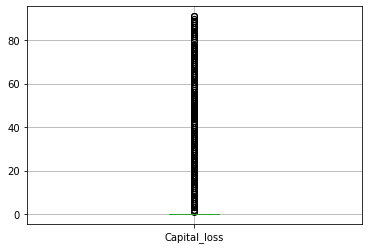

In [94]:
df.boxplot('Capital_loss')

In [95]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df.apply(zscore)
threshold=3
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)
print(27097/32560)
df1.head()

(32560, 15)
(27097, 15)
0.8322174447174447


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0
5,32,3,8535,6,4,3,7,1,2,0,0,0,15,22,0


# Train, Test Split

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.drop(['Income'],axis=1)
print(x.shape)
y1=df['Income'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)

(32560, 14)
(32560, 1)


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29304, 14)
(3256, 14)
(29304, 1)
(3256, 1)


# 1. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [99]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7949764608754483


In [100]:
lg=LogisticRegression(C=10,penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test) 
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 79.51474201474201 Percentage
Confusion Matrix 
 [[2278  146]
 [ 521  311]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2424
           1       0.68      0.37      0.48       832

    accuracy                           0.80      3256
   macro avg       0.75      0.66      0.68      3256
weighted avg       0.78      0.80      0.77      3256



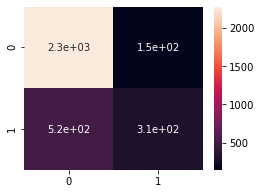

In [101]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predlg),annot=True)
plt.show()

# 2. Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
grid= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc1=DecisionTreeClassifier()
dtc1_cv=GridSearchCV(dtc1,grid,cv=5)
dtc1_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",dtc1_cv.best_params_)
print("Accuracy :",dtc1_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.855958179043169


In [104]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 85.22727272727273 Percentage
Confusion Matrix 
 [[2313  111]
 [ 370  462]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.95      0.91      2424
           1       0.81      0.56      0.66       832

    accuracy                           0.85      3256
   macro avg       0.83      0.75      0.78      3256
weighted avg       0.85      0.85      0.84      3256



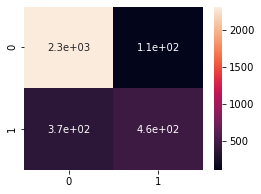

In [105]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,preddtc),annot=True)
plt.show()

# 3. Support Vector Classifier

In [106]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [107]:
svm1=SVC()
gamma_range=[0.01, 0.1, 1, 10, 100]
c_range=[0.01, 0.1, 1, 10, 100]
grid= dict(gamma = gamma_range, C = c_range)
svm1_cv=GridSearchCV(svm1,grid,cv=5)
svm1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm1_cv.best_params_)
print("accuracy :",svm1_cv.best_score_)

KeyboardInterrupt: 

In [108]:
svc=SVC(C=0.001,gamma=0.001)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.7444717444717445
Confusion Matrix [[2424    0]
 [ 832    0]]
Classification Report               precision    recall  f1-score   support

           0       0.74      1.00      0.85      2424
           1       0.00      0.00      0.00       832

    accuracy                           0.74      3256
   macro avg       0.37      0.50      0.43      3256
weighted avg       0.55      0.74      0.64      3256



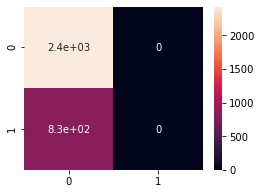

In [109]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predsvc),annot=True)
plt.show()

# 4. K-Neighbors Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [112]:
KNeighborsClassifier('algorithm').get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
knn1=KNeighborsClassifier()
k_range=list(range(1,51))
grid=dict(n_neignbors=k_range)
print(grid)
knn_cv=GridSearchCV(knn1,grid,cv=10, scoring='accuracy',return_train_score=False)
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_scores_)

In [128]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.7714987714987716
Confusion Matrix 
 [[4988    2]
 [1486   36]]
Classification Report               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4990
           1       0.95      0.02      0.05      1522

    accuracy                           0.77      6512
   macro avg       0.86      0.51      0.46      6512
weighted avg       0.81      0.77      0.68      6512



In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predknn),annot=True)
plt.show()

# 5. Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc1=RandomForestClassifier()
parameters={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']
}
rfc_cv=GridSearchCV(rfc1,parameters,cv=10)
rfc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("Accuracy :",rfc_cv.best_score_)

In [118]:
rfc=RandomForestClassifier(random_state=42,max_features='sqrt',criterion='entropy',max_depth=7,n_estimators=500)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.8556511056511057
Confusion Matrix 
 [[4790  200]
 [ 740  782]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4990
           1       0.80      0.51      0.62      1522

    accuracy                           0.86      6512
   macro avg       0.83      0.74      0.77      6512
weighted avg       0.85      0.86      0.84      6512



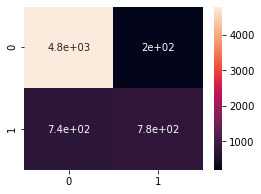

In [119]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predrfc),annot=True)
plt.show()

# 6. AdaBoost Classifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.8639434889434889
Confusion Matrix 
 [[4717  273]
 [ 613  909]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4990
           1       0.77      0.60      0.67      1522

    accuracy                           0.86      6512
   macro avg       0.83      0.77      0.79      6512
weighted avg       0.86      0.86      0.86      6512



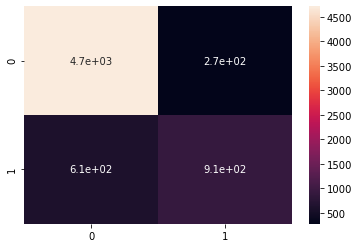

In [125]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,predad),annot=True)
plt.show()

# Cross Validation Score

In [126]:
from sklearn.model_selection import cross_val_score

In [129]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression(C=10) = [0.80681818 0.79668305 0.77733415 0.8009828  0.78531941 0.79176904
 0.79115479 0.79391892 0.78624079 0.78900491]
Mean Score of LogisticRegression(C=10) = 0.7919226044226044
Difference of Accuracy in LogisticRegression(C=10) and Cross Val Score of LogisticRegression(C=10) is= 0.014742014742014753


Cross Val Score of DecisionTreeClassifier(max_depth=8) = [0.84766585 0.85595823 0.85749386 0.85042998 0.85472973 0.85872236
 0.85810811 0.86425061 0.85687961 0.84920147]
Mean Score of DecisionTreeClassifier(max_depth=8) = 0.8553439803439803
Difference of Accuracy in DecisionTreeClassifier(max_depth=8) and Cross Val Score of DecisionTreeClassifier(max_depth=8) is= 0.00660319410319421


Cross Val Score of SVC(C=0.001, gamma=0.001) = [0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75890663]
Mean Score of SVC(C=0.001, gamma=0.001) = 0.7591830466830467
Difference of Accuracy in SVC(C=0.001, gamma=0

# Conclusion

Here AdaBoost Classifier give the highest accuracy score. Hence we use ad for Testing of Dataset.

# Saving the Model

In [130]:
import joblib

In [131]:
joblib.dump(ad,'bankad.org')

['bankad.org']

In [132]:
bankfile=joblib.load('bankad.org')